<a href="https://colab.research.google.com/github/rivalsolmons/BTP/blob/main/new10dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effort and cost Estimation in Agile Software Development

In [442]:
#@title Effort Estimation on Zia 
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

data_read = pd.read_csv('Zia_upd2.csv')

In [443]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [444]:
#@title Defining Category 1 and Category 2


features = [	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time', 'Actual_Cost']
#features = ['Actual_Cost',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Act_Time']



Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [445]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
count,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,2.100000e+01
mean,4.071429,0.780381,3.023810,10.0,21.952381,246190.476190,56.428571,1.114286e+06
std,0.325796,0.071028,0.438069,0.0,0.218218,46419.413016,26.177417,7.058936e+05
min,3.700000,0.646000,2.400000,10.0,21.000000,190000.000000,21.000000,3.500000e+05
25%,3.900000,0.742000,2.800000,10.0,22.000000,220000.000000,35.000000,6.000000e+05
50%,4.000000,0.758000,2.900000,10.0,22.000000,250000.000000,52.000000,8.000000e+05
75%,4.200000,0.833000,3.200000,10.0,22.000000,250000.000000,80.000000,1.500000e+06
max,4.900000,0.903000,4.200000,10.0,22.000000,400000.000000,112.000000,3.200000e+06


In [446]:
#For debugging purpose
#print(Cat_1)

In [447]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,4.2,0.687,2.7,10,22,230000,63,1200000
1,3.7,0.701,2.5,10,21,260000,92,1600000
2,4.0,0.878,3.3,10,22,250000,56,1000000
3,4.5,0.886,3.8,10,22,300000,86,2100000
4,4.9,0.903,4.2,10,22,300000,32,750000
5,4.1,0.903,3.6,10,22,400000,91,3200000
6,4.2,0.859,3.4,10,22,250000,35,600000
7,3.8,0.833,3.0,10,22,250000,93,1800000
8,3.9,0.646,2.4,10,22,190000,36,500000
9,4.6,0.758,3.2,10,22,250000,62,1200000


In [448]:
print('The overall nummber of projects are: ',len(Cat_2))

The overall nummber of projects are:  21


In [449]:
display(Cat_2)

0     156
1     202
2     173
3     331
4     124
5     339
6      97
7     257
8      84
9     211
10    131
11    112
12    101
13     74
14     62
15    289
16    113
17    141
18    213
19    137
20     91
Name: Effort, dtype: int64

In [450]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [451]:
import math
print(y_test)


8      84
13     74
20     91
1     202
11    112
Name: Effort, dtype: int64


In [452]:
print(y_pred1)

[ 74.47682286  80.91188027  75.77505588 205.70522814 113.86072131]


In [453]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [491]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math



print('r2 Score::',r2_score(y_test,y_pred1))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred1))
print('MSE', mean_squared_error(y_test,y_pred1))
xv= math.sqrt(mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error::",xv)

r2 Score:: 0.9640152579803739
Mean Absolute error::: 7.445190192851681
MSE 77.49098285474352
Root Mean Squared Error:: 8.802896276495794


In [455]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

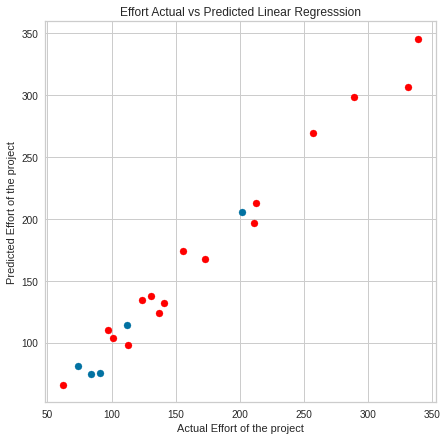

In [456]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [457]:
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [458]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
8,84,74.476823,9.523177
13,74,80.911880,-6.911880
20,91,75.775056,15.224944
1,202,205.705228,-3.705228
11,112,113.860721,-1.860721


In [459]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [460]:

print(arr)

    Actual  Cost
8             84
13            74
20            91
1            202
11           112


In [461]:
print(np.absolute(arr2))

    Difference
8     9.523177
13    6.911880
20   15.224944
1     3.705228
11    1.860721


In [462]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [463]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [464]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [475]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

print(len(y_pred))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred))
#print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred)))


# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_test,y_pred))


5
Mean Absolute error::: 15.066666666666668
The r_sq y_test , y_test_pred is: 0.74


In [467]:
print("Mean Squared Error::",mean_squared_error(y_test,y_pred))
xv= math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error::",xv)

#MMRE USING LOGICAL CALCULATION

diff=np.absolute((y_test-y_pred)/y_test)
MRE=diff/len(y_test) 
MMRE=np.mean(MRE)

print('MMRE :',MMRE)

Mean Squared Error:: 561.8222222222223
Root Mean Squared Error:: 23.702789334215968
MMRE : 0.02178712658910679


In [ ]:
import pandas as pd

pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'Difference':y_test-y_pred})
xyy=pred_y_diff.Difference.abs()
pred_y_diff[0:21]

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

----------------------------

In [ ]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
#print('MMRE :',Raw_mean)

# percentage MMRE 
print(Raw_mean)
#print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [468]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [ ]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

In [469]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [470]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [471]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [476]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [477]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [478]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq y_test , y_test_pred is: 1.00


In [488]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 155.0
Mean Absolute Error:: 12.2
Root Mean Squared Error:: 12.449899597988733


In [480]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: 0.93


<function matplotlib.pyplot.show(*args, **kw)>

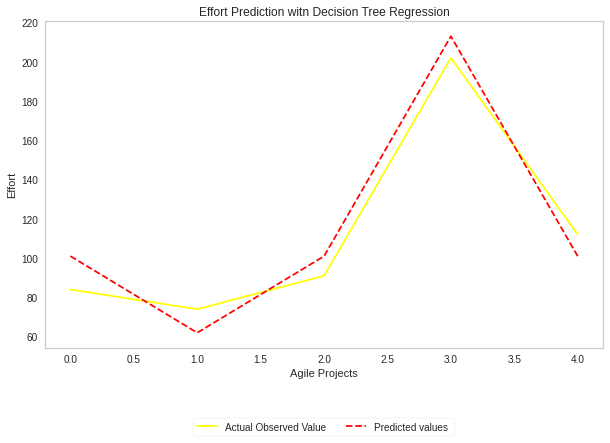

In [481]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

In [483]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

# percentage MMRE 
#print('Percentage MMRE :',Raw_mean*100)

MMRE : 0.13268015526678892


In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

In [492]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [493]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [494]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [495]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [504]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.98
r2 Score  0.7928419438459189


In [501]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 446.10244444444436
Mean Absolute Error:: 16.526666666666664
Root Mean Squared Error:: 21.121137385198846


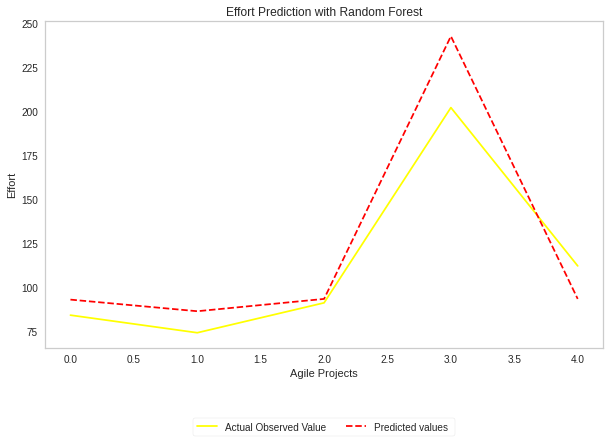

In [497]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [498]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,84,92.833333,-0.105159
13,74,86.233333,-0.165315
20,91,93.233333,-0.024542
1,202,242.566667,-0.200825
11,112,93.233333,0.167560


In [505]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 0.13268015526678892


# Support Vector Machine

In [ ]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


In [ ]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [ ]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [ ]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [ ]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [ ]:
# X.shape

In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [ ]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

In [ ]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

In [ ]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [ ]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

In [ ]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

In [ ]:
#pip install yellowbrick

In [ ]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# testing the Model Evaluation



In [ ]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

In [ ]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

In [ ]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [ ]:
score_train

In [ ]:
score_train = np.mean(score_train)
print(score_train)

In [ ]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

In [ ]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [ ]:
print(score_test)

In [ ]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

# Random Forest Regression

In [ ]:
# Let us first import The

